In [1]:
import chess.pgn
import chess
import chess.engine
import math
import numpy
import pandas as pd
import os
import pyarrow
import logging
import re

path = "./lichess_2016-09_engineered_df_eco.feather"

df = pd.read_feather(path)
df

White,-ArtanS-,-LEXX-,-chessnoob-,-sayen23-,0203,1--,10H01,1111112222,1taurus,234234,...,zzalimm,zzchess,zzippy,zzoora,zzpp,zztopillo,zzulu,zzxc,zzz___zzz,zzzombie
ECO,,,,,,,,,,,,,,,,,,,,,
A00,1.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.318584,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
A01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A02,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A04,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.5,0.800000,0.0,0.0,0.0,0.0,0.0
A10,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E10,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
E11,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
E12,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [2]:
from eco import eco_decode
df_open = df.rename_axis('Opening').reset_index()
df_open['Opening'] = df_open['Opening'].apply(eco_decode)
df_open

White,Opening,-ArtanS-,-LEXX-,-chessnoob-,-sayen23-,0203,1--,10H01,1111112222,1taurus,...,zzalimm,zzchess,zzippy,zzoora,zzpp,zztopillo,zzulu,zzxc,zzz___zzz,zzzombie
0,Polish (Sokolsky) opening,1.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
1,Nimzovich-Larsen attack,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bird's opening,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Reti opening,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.800000,0.0,0.0,0.0,0.0,0.0
4,English opening,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Queen's pawn game,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0
60,Bogo-Indian defence,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
61,Queen's Indian defence,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62,Nimzo-Indian defence,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
def leaf_label_function(index):
    return df.iloc[index, 0]

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df.iloc[:,1:])
x = ss.transform(df.iloc[:,1:])
x

array([[-0.44874707, -0.39608616,  1.5661272 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104],
       [-0.44874707, -0.39608616, -0.3525017 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104],
       [-0.44874707, -0.39608616, -0.3525017 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104],
       ...,
       [-0.44874707, -0.39608616, -0.3525017 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104],
       [-0.44874707, -0.39608616, -0.3525017 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104],
       [-0.44874707,  0.01228298, -0.3525017 , ..., -0.3436073 ,
        -0.4728795 , -0.37761104]], dtype=float32)

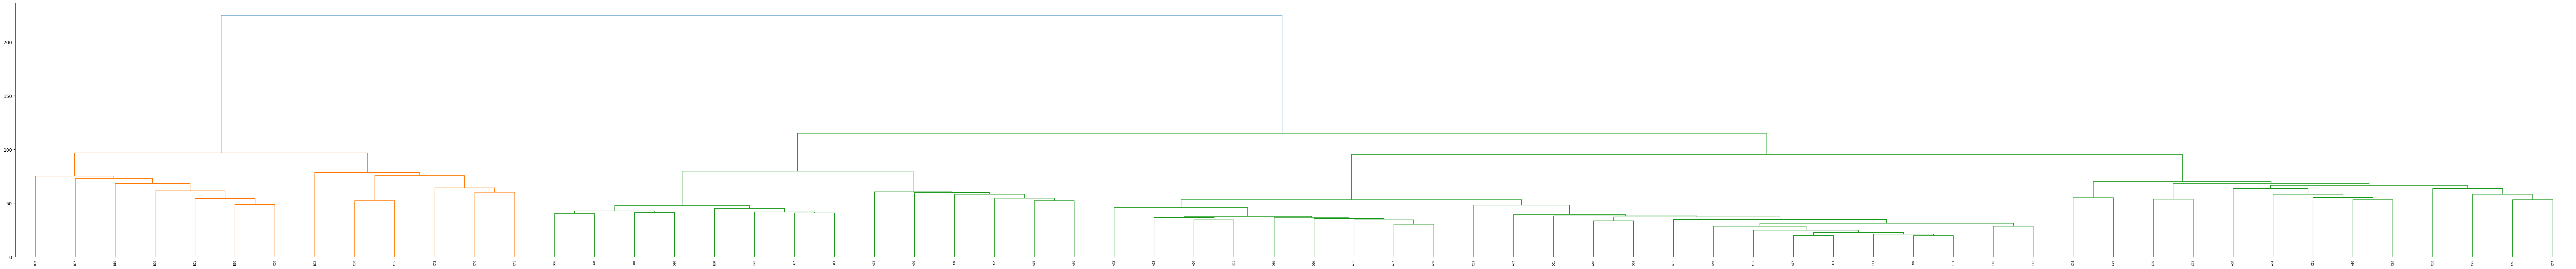

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 10))
link = linkage(df, method='ward')
dend = dendrogram(link, labels=df.index.tolist(),)
plt.show()

In [6]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Check the transformed data
print(df_std.head())

White  -ArtanS-    -LEXX-  -chessnoob-  -sayen23-      0203      1--  \
ECO                                                                    
A00    2.182644 -0.448747    -0.396086   1.566127 -0.524092 -0.52075   
A01   -0.586770 -0.448747    -0.396086  -0.352502 -0.524092 -0.52075   
A02   -0.586770 -0.448747    -0.396086  -0.352502 -0.524092 -0.52075   
A04   -0.586770 -0.448747    -0.396086   3.484756 -0.524092 -0.52075   
A10   -0.586770 -0.448747     3.279236  -0.352502 -0.524092 -0.52075   

White     10H01  1111112222   1taurus    234234  ...   zzalimm   zzchess  \
ECO                                              ...                       
A00   -0.416255   -0.250378 -0.280732  1.443387  ... -0.481017 -0.340491   
A01   -0.416255   -0.250378 -0.280732 -0.343823  ... -0.481017 -0.340491   
A02   -0.416255   -0.250378 -0.280732  2.461104  ... -0.481017 -0.340491   
A04   -0.416255   -0.250378 -0.280732  5.266031  ... -0.481017 -0.340491   
A10   -0.416255   -0.250378 -0.280732 -

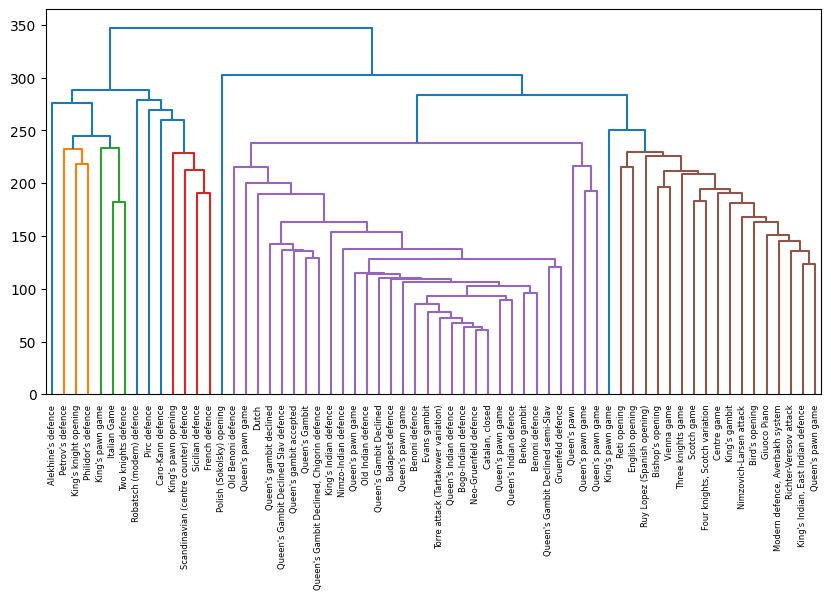

In [16]:
plt.figure(figsize=(10, 5))
decoded_labels = [eco_decode(ec) for ec in df_std.index.tolist()]

link_std = linkage(df_std, method='complete')
dend_std = dendrogram(link_std, labels=decoded_labels,)
plt.savefig('dendro_hori', bbox_inches='tight')
plt.show()

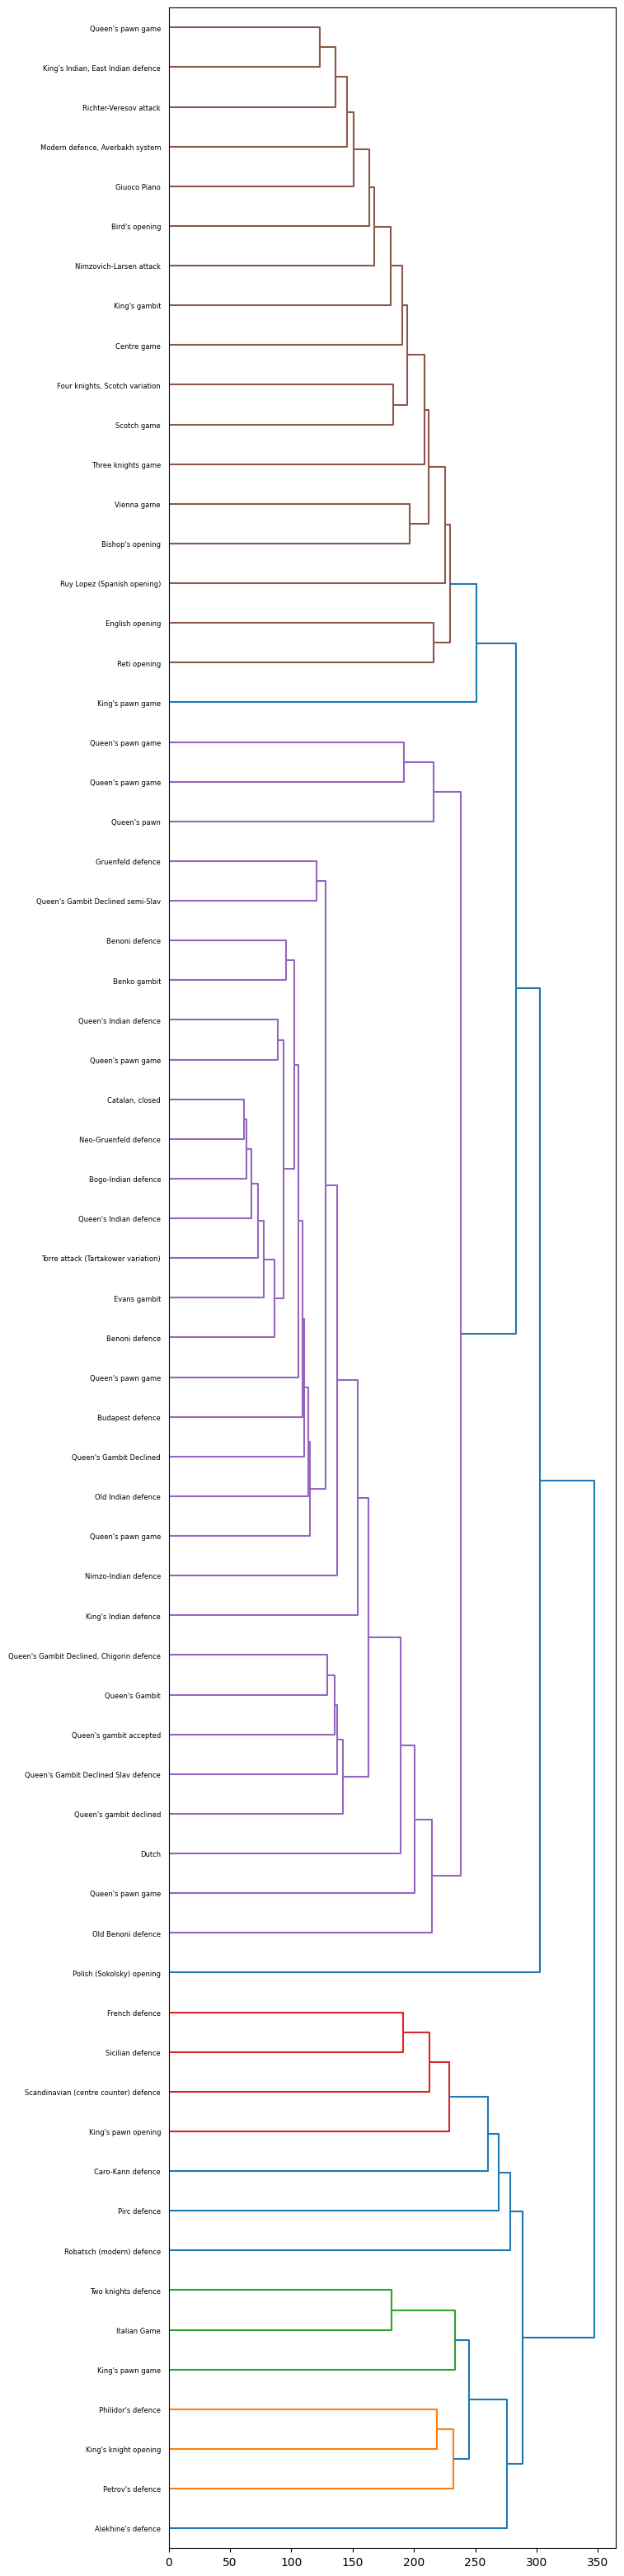

In [8]:
plt.figure(figsize=(7, 40))
link_std = linkage(df_std, method='complete')
dend_std = dendrogram(link_std, labels=decoded_labels, orientation='right')
plt.savefig('dendrogram_vert')
plt.show()

In [9]:
link_std

array([[ 55.        ,  58.        ,  61.13392155,   2.        ],
       [ 60.        ,  64.        ,  63.60557536,   3.        ],
       [  9.        ,  65.        ,  67.16335883,   4.        ],
       [ 46.        ,  66.        ,  72.5201196 ,   5.        ],
       [ 39.        ,  67.        ,  77.5637199 ,   6.        ],
       [ 14.        ,  68.        ,  85.92773706,   7.        ],
       [ 59.        ,  61.        ,  89.06736102,   2.        ],
       [ 69.        ,  70.        ,  93.44020018,   9.        ],
       [ 15.        ,  16.        ,  95.80742815,   2.        ],
       [ 71.        ,  72.        , 102.71480731,  11.        ],
       [ 11.        ,  73.        , 106.06658599,  12.        ],
       [ 12.        ,  74.        , 109.39087818,  13.        ],
       [ 54.        ,  75.        , 110.22813563,  14.        ],
       [ 13.        ,  76.        , 113.9928102 ,  15.        ],
       [ 57.        ,  77.        , 115.10298812,  16.        ],
       [ 53.        ,  56

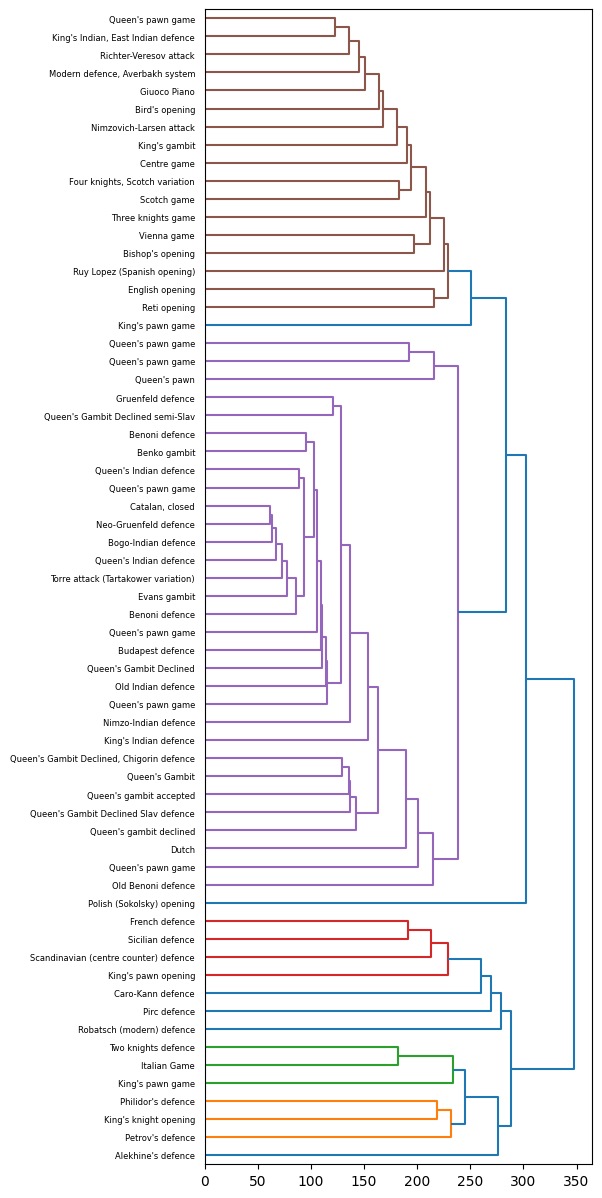

In [10]:
plt.figure(figsize=(5, 15))
link_std = linkage(df_std, method='complete')
dend_std = dendrogram(link_std, labels=decoded_labels, orientation='right')
plt.savefig('dendrogram_vert')
plt.show()